In [1]:
import pathlib
project_path = pathlib.Path().resolve().parent.parent
paths = []

import sys
path = project_path.joinpath("benchmark/third_party/bench-mr/python").as_posix()
if path not in sys.path:
    sys.path.append(path)

import os
os.environ["MPB_BINARY"] = "./benchmark"
os.environ["MPB_PYTHON_BINARY"] = "../../../../scripts/run_gpmp2.py"
os.environ["MPB_BINARY_DIR"] = "/home/mikhail/research/pytorch-motion-planner/benchmark/third_party/bench-mr/bin"
os.environ["PYTHONPATH"] = "../../../../build/benchmark:" + project_path.as_posix()


import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42

from plot_env import plot_env
import json
from plot_env import plot_env, plot_env_options
from plot_trajectory import plot_trajectory, plot_nodes, plot_trajectory_options
from color import get_color, get_colors
import matplotlib.pyplot as plt
from mpb import MPB, MultipleMPB
from plot_stats import plot_planner_stats

%config InlineBackend.figure_format='retina'

# Run one experiment

In [7]:
m = MPB()
m.set_corridor_grid_env(100, 100, branches=100, radius=3, seed=3)
m["max_planning_time"] = 60
m["benchmark.planning"]['constrained_onf_planner'] = True
m.set_planners(['constrained_onf_planner'])
m.run(id="corridor", runs=1)

Running MPB with ID corridor (log file at corridor.log)...


corridor:   0%|          | 0/1 [00:00<?, ?it/s]

0

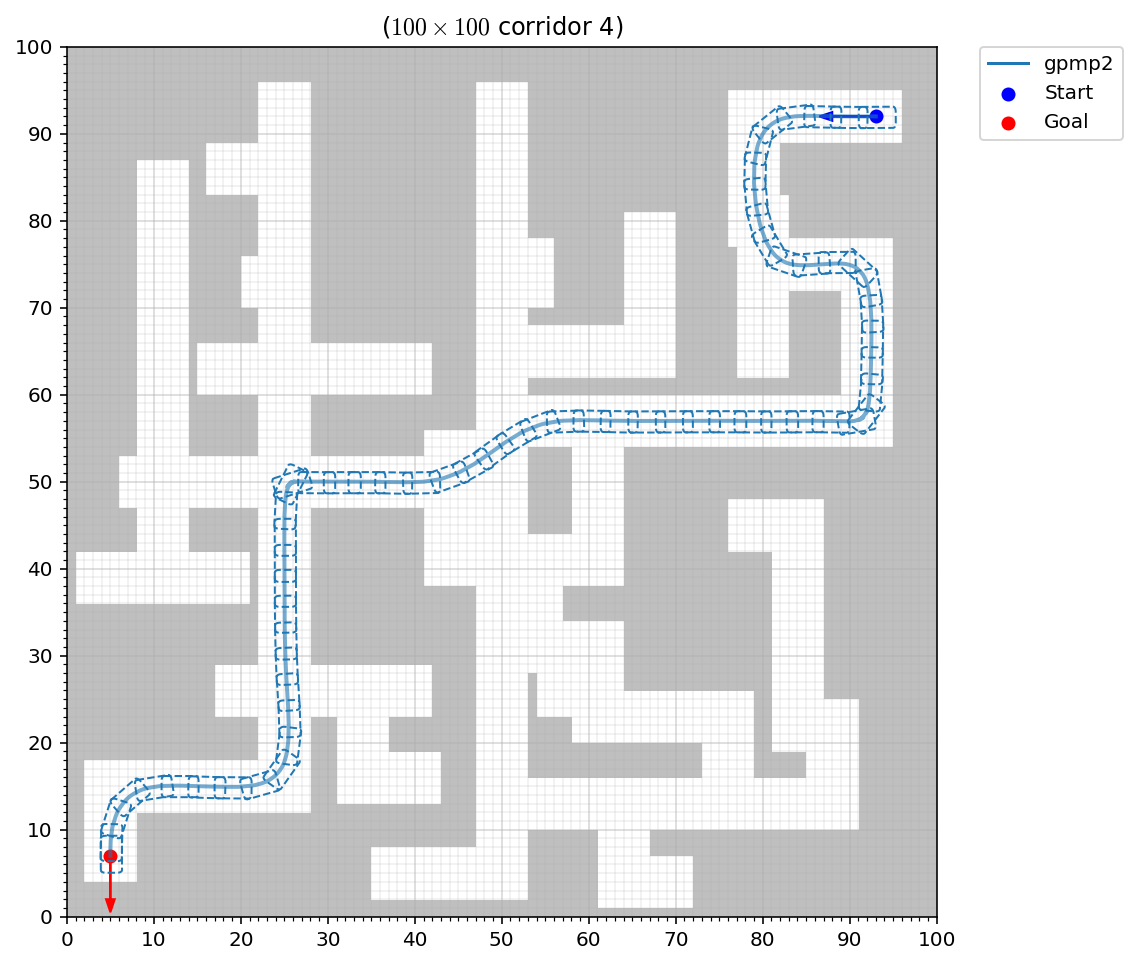

In [8]:
m.visualize_trajectories(draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/corridor_experiment.pdf",
                         num_colors=10)

# Run pool

Available memory: 15.69 GB, limiting each MPB process to 41.7% usage (6.54 GB).
Creating pool of 1 processes.
Running MPB with ID corridor_0 (log file at corridor/corridor_0.log)...


corridor_0:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 0 (corridor_0) finished successfully.
Running MPB with ID corridor_1 (log file at corridor/corridor_1.log)...


corridor_1:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 1 (corridor_1) finished successfully.
Running MPB with ID corridor_2 (log file at corridor/corridor_2.log)...


corridor_2:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 2 (corridor_2) finished successfully.
Running MPB with ID corridor_3 (log file at corridor/corridor_3.log)...


corridor_3:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 3 (corridor_3) finished successfully.
Running MPB with ID corridor_4 (log file at corridor/corridor_4.log)...


corridor_4:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 4 (corridor_4) finished successfully.
Running MPB with ID corridor_5 (log file at corridor/corridor_5.log)...


corridor_5:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 5 (corridor_5) finished successfully.
Running MPB with ID corridor_6 (log file at corridor/corridor_6.log)...


corridor_6:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 6 (corridor_6) finished successfully.
Running MPB with ID corridor_7 (log file at corridor/corridor_7.log)...


corridor_7:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 7 (corridor_7) finished successfully.
Running MPB with ID corridor_8 (log file at corridor/corridor_8.log)...


corridor_8:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 8 (corridor_8) finished successfully.
Running MPB with ID corridor_9 (log file at corridor/corridor_9.log)...


corridor_9:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 9 (corridor_9) finished successfully.
All benchmarks succeeded.


True

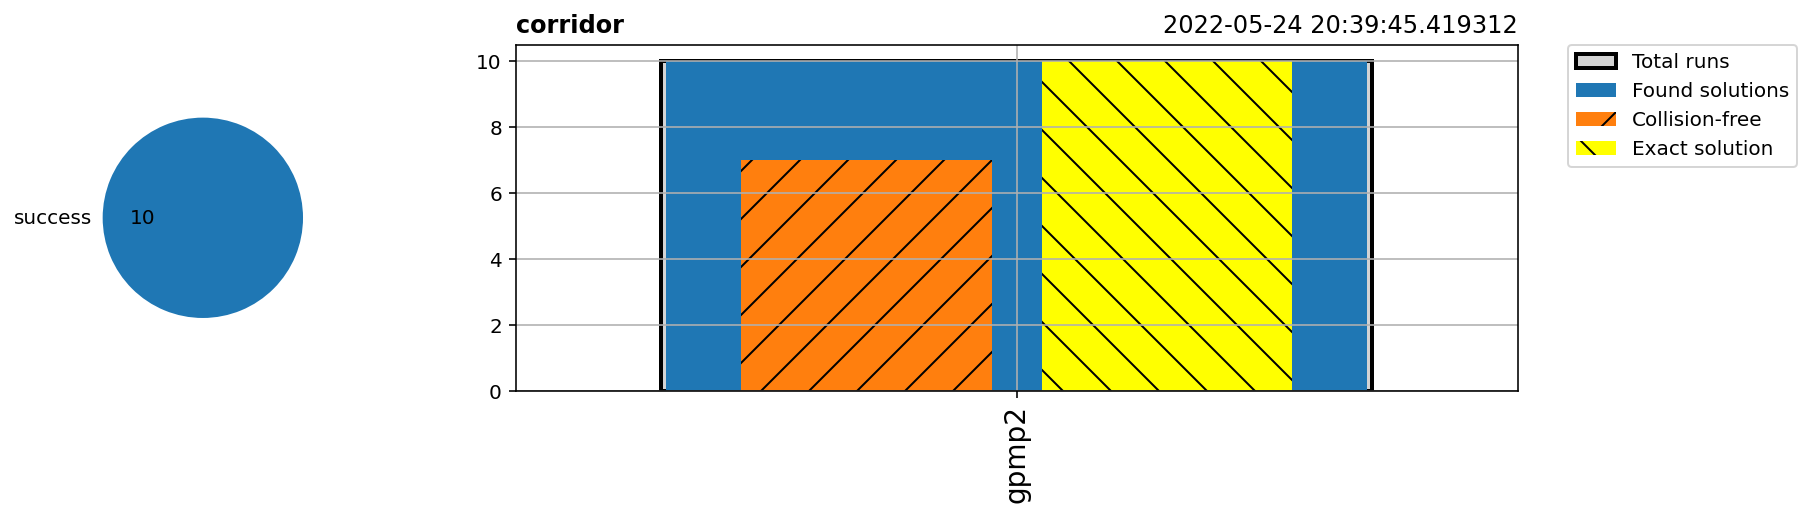

In [18]:
env = os.environ
env["MPLBACKEND"] = "TkAgg"
pool = MultipleMPB()
for i in range(10):
    m = MPB()
    m.set_corridor_grid_env(100, 100, branches=100, radius=3, seed=i + 2)
    m["max_planning_time"] = 60
    m["benchmark.planning"]['constrained_onf_planner'] = True
    m.set_planners(['constrained_onf_planner'])
    pool.benchmarks.append(m)

pool.run_parallel(id="corridor_gpmp2", runs=1, processes=1)

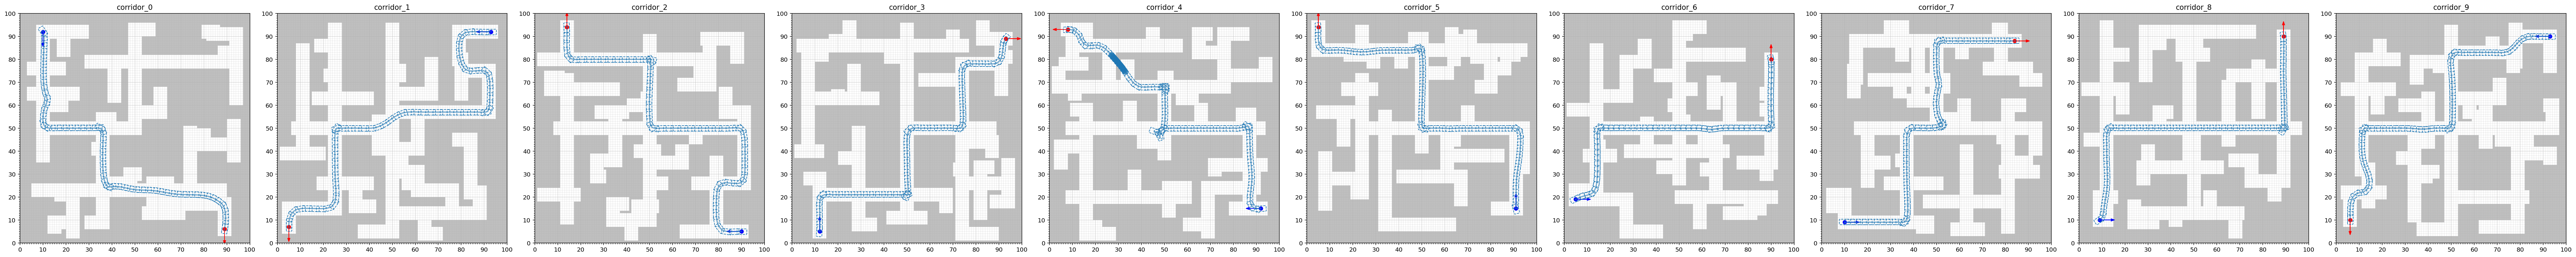

In [10]:
pool.visualize_trajectories(draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/corridor_experiment_pool.pdf",
                         num_colors=10)

Successfully merged [corridor/corridor_0_results.json, corridor/corridor_1_results.json, corridor/corridor_2_results.json, corridor/corridor_3_results.json, corridor/corridor_4_results.json, corridor/corridor_5_results.json, corridor/corridor_6_results.json, corridor/corridor_7_results.json, corridor/corridor_8_results.json, corridor/corridor_9_results.json] into corridors_result_gpmp2.json.
Visualizing corridors_result_gpmp2.json...


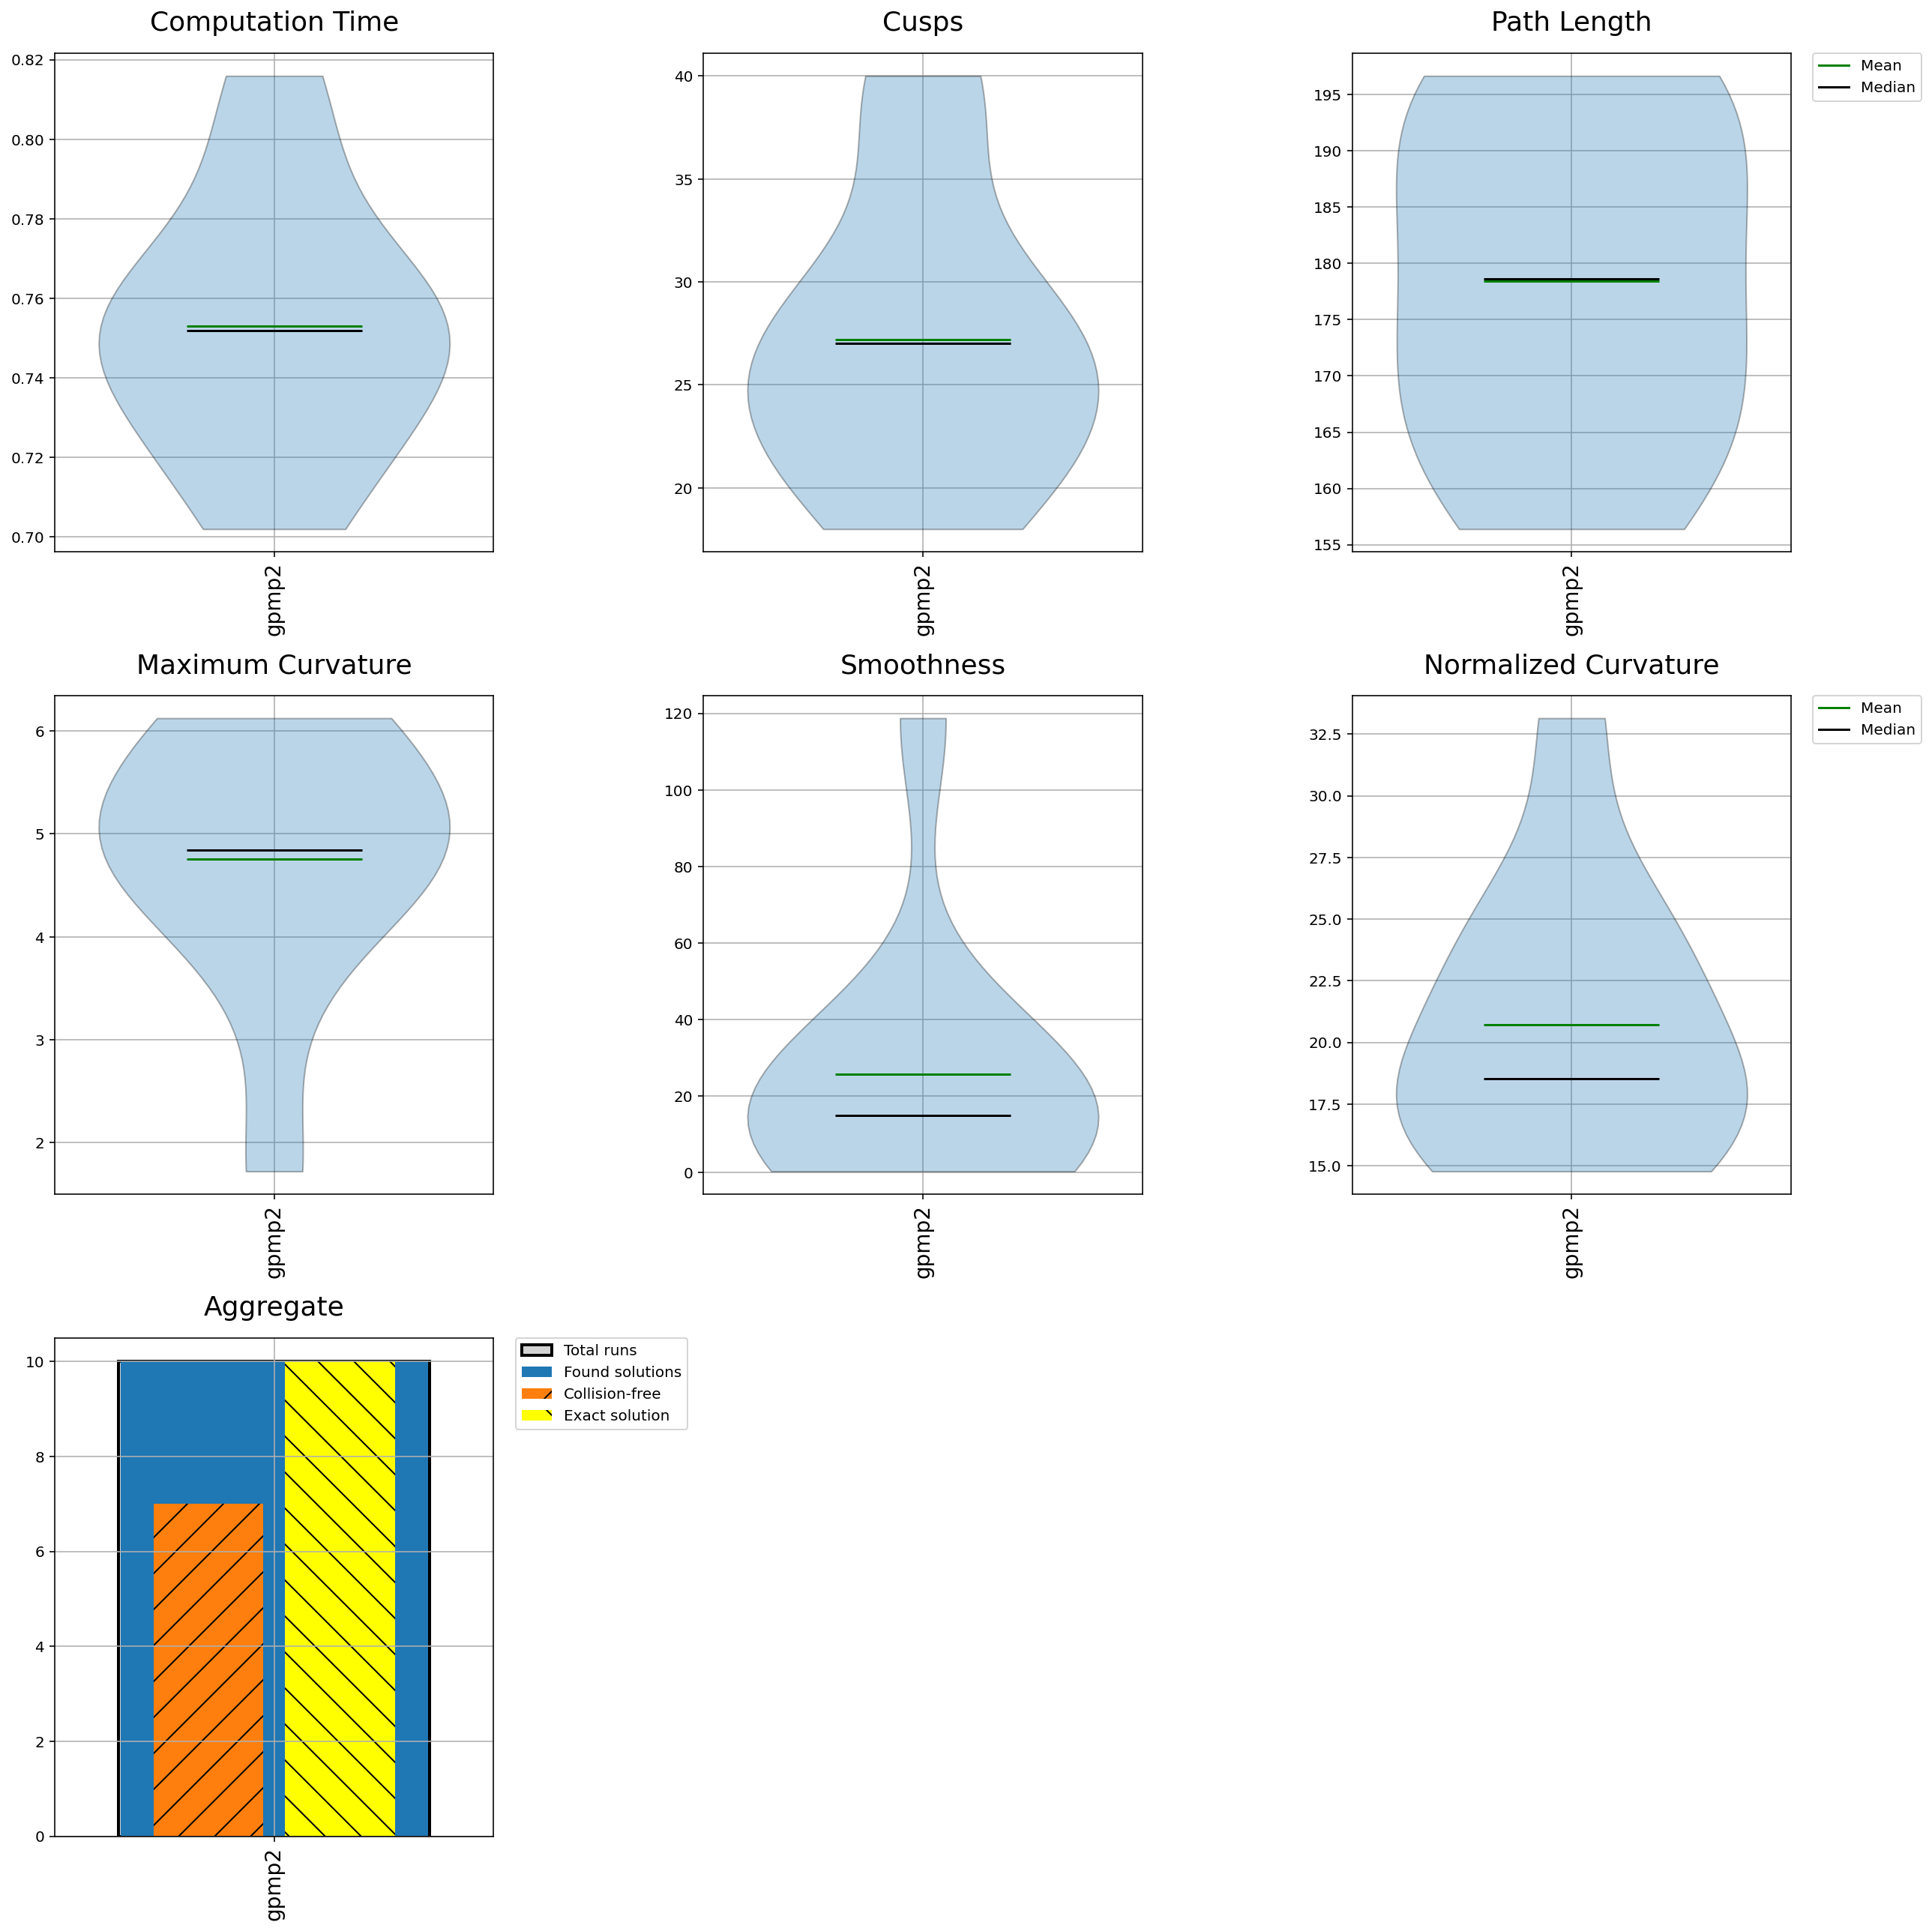

In [19]:
result = "corridors_result_gpmp2.json"
pool.merge(result, make_separate_runs=True)
plot_planner_stats(result, metrics="planning_time, cusps, path_length, max_curvature, smoothness, normalized_curvature, aggregate")

In [20]:
data = json.load(open(result, "r"))
data["runs"][0]["plans"]['gpmp2']['stats']

{'aol': 0.372421370266004,
 'collision_time': 0.016252,
 'collisions': [],
 'cusps': [[10.883789255169921, 92.007292716513],
  [9.522979836456015, 92.43524949007669],
  [11.079128565870285, 90.62679021766853],
  [10.80887009328394, 91.92071812624657],
  [10.828751164105693, 50.423271277716424],
  [10.607128069273465, 50.69820915224158],
  [11.32109818722551, 50.09282280744102],
  [10.98285830445198, 50.25571920561836],
  [35.09467149773775, 49.985876952492845],
  [34.77994421281917, 50.07060200926454],
  [36.0806788290965, 49.320571775838715],
  [35.55869344531558, 49.92314097137527],
  [36.14157218570777, 48.675422894730424],
  [36.133619301825256, 48.74369059787189],
  [88.24876746708169, 17.10995848032852],
  [87.57401517522086, 17.242276205813862],
  [88.98967972820357, 16.356340577097292],
  [88.52653425584379, 16.888004832234305]],
 'exact_goal_path': True,
 'max_clearing_distance': 6.504418820883237,
 'max_curvature': 1.722501908549326,
 'mean_clearing_distance': 3.6103812341566